# Imports and Prepare Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from random import randint

2024-11-24 17:45:53.745677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732457753.763332  106766 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732457753.768363  106766 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 17:45:53.785264: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('../data/mnist/x_train.npy')
y_train = np.load('../data/mnist/y_train.npy')
x_test  = np.load('../data/mnist/x_test.npy')
y_test  = np.load('../data/mnist/y_test.npy')

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### predition function

In [6]:
def predict_test_data(model, show_image=True):
    ims_idx = []
    for i in range(10):
        x = randint(0, 9999)
        ims_idx.append(x)

    results = []
    msgs = []
    r = str()
    msg = ''

    for i in ims_idx:
        results.append(model.predict(x_test[i].reshape(1, 28, 28, 1)))

    for i in range(len(ims_idx)):
        if str(np.argmax(results[i])) == str(y_test[ims_idx[i]]):
            msg = "Correct " + str(np.argmax(results[i]))
            r += 'T '
        else:
            msg = "Wrong " + str(np.argmax(results[i])) + " - " + str(y_test[ims_idx[i]])
            r += 'F ' 

        msgs.append(msg)
        msg = ''
        
    print(r)
    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j][z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(x_test[ims_idx[i]].reshape(28, 28), cmap='binary')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()

    return r

def predict_real_data(model, show_image=True):
    ls = os.listdir('../img/')
    ims = [] 
    idx = []
    r = str()
    msgs = []

    for i in ls:
        if i.endswith('.png'):
            ims.append(imageio.imread('../img/' + i, mode='F'))  
            idx.append(i[0])

    for i in range(len(ims)):
        result = np.argmax(model.predict(ims[i].reshape(1, 28, 28, 1)))

        if str(result) == str(idx[i]):
            msg = "Correct " + str(result)
            r += 'T '
        else:
            msg = "Wrong " + str(result) + " - " + str(idx[i])
            r += 'F '

        msgs.append(msg)

    print(r)

    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j, z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(ims[i], cmap='grey')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()
        
    return r

# GRU

### Create Model

In [7]:
PATH = '../saved_weights/gru_model/' + 'gru_model.weights.h5'

model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(128, input_shape=(28, 28), activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])


I0000 00:00:1732457779.893073  106766 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 720 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        60,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,962 (242.04 KB)

 Trainable params: 61,962 (242.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [9]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
  16/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1158 - loss: 2.2934

I0000 00:00:1732457785.324037  106906 cuda_dnn.cc:529] Loaded cuDNN version 90300


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7537 - loss: 0.7089 - val_accuracy: 0.9692 - val_loss: 0.1039
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.1089 - val_accuracy: 0.9741 - val_loss: 0.0835
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0661 - val_accuracy: 0.9806 - val_loss: 0.0679
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9855 - val_loss: 0.0471
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9872 - val_loss: 0.0442


In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9845 - loss: 0.0509


[0.044236473739147186, 0.9872000217437744]

### Save and Load

In [12]:
model.save_weights(PATH)

In [11]:
model.load_weights(PATH)

### Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
T T T T T T T T T T 


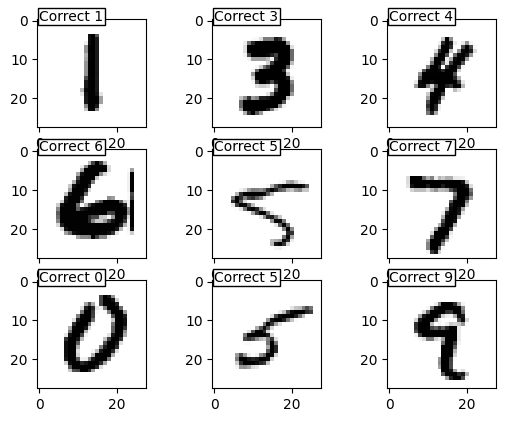

In [12]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/tmp/ipykernel_106766/2023242906.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('../img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
F F F F F F F F F 


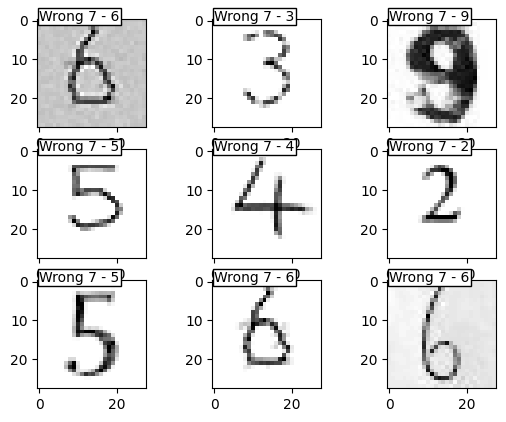

In [13]:
r = predict_real_data(model)